# **Decision Tree Model**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### **1. Reading of the processed dataset**

In [2]:
X_train = pd.read_csv('../data/processed/train_test_madrid/Xtrain.csv')
y_train = pd.read_csv('../data/processed/train_test_madrid/ytrain.csv')

X_test = pd.read_csv('../data/processed/train_test_madrid/Xtest.csv')
y_test = pd.read_csv('../data/processed/train_test_madrid/ytest.csv')

df = pd.read_csv('../data/processed/factorize_csv/madrid_fct.csv')
df

,LATITUD,LONGITUD,MEDIA_DIARIA,N_MUNICIPIO_N,MAGNITUD_N,TIPO_AREA_N,TIPO_ESTACION_N,PELIGROSIDAD_N
0,40.54035,-3.64525,1.045833,0,0,0,0,0
1,40.54035,-3.64525,0.966667,0,0,0,0,0
2,40.54035,-3.64525,1.175000,0,0,0,0,0
3,40.54035,-3.64525,1.087500,0,0,0,0,0
4,40.54035,-3.64525,0.429167,0,0,0,0,0
...,...,...,...,...,...,...,...,...
53926,40.24790,-4.27520,2.250000,9,7,1,1,0
53927,40.24790,-4.27520,2.791667,9,7,1,1,0
53928,40.24790,-4.27520,2.875000,9,7,1,1,0
53929,40.24790,-4.27520,3.000000,9,7,1,1,0


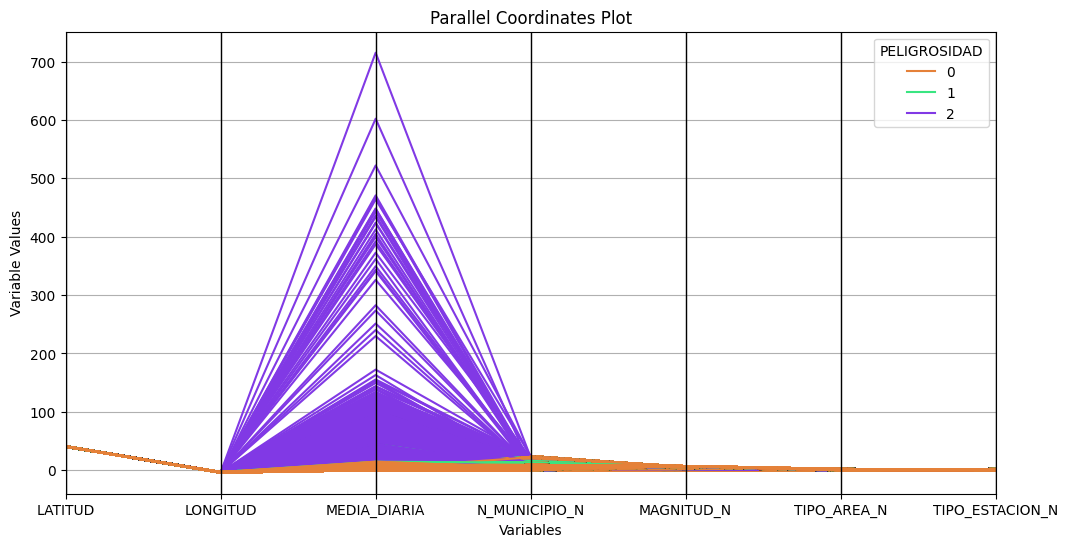

In [3]:
plt.figure(figsize=(12, 6))

# Use the PELIGROSIDAD_N column as the class_column parameter
pd.plotting.parallel_coordinates(df, class_column= 'PELIGROSIDAD_N', color= ['#E58139', '#39E581', '#8139E5'])

plt.title('Parallel Coordinates Plot')
plt.ylabel('Variable Values')
plt.xlabel('Variables')
plt.legend(title= 'PELIGROSIDAD', loc= 'upper right')

plt.show()

### **2. Model initialisation and training**

In [4]:
# Create and train the decision tree model
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 23)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=23)

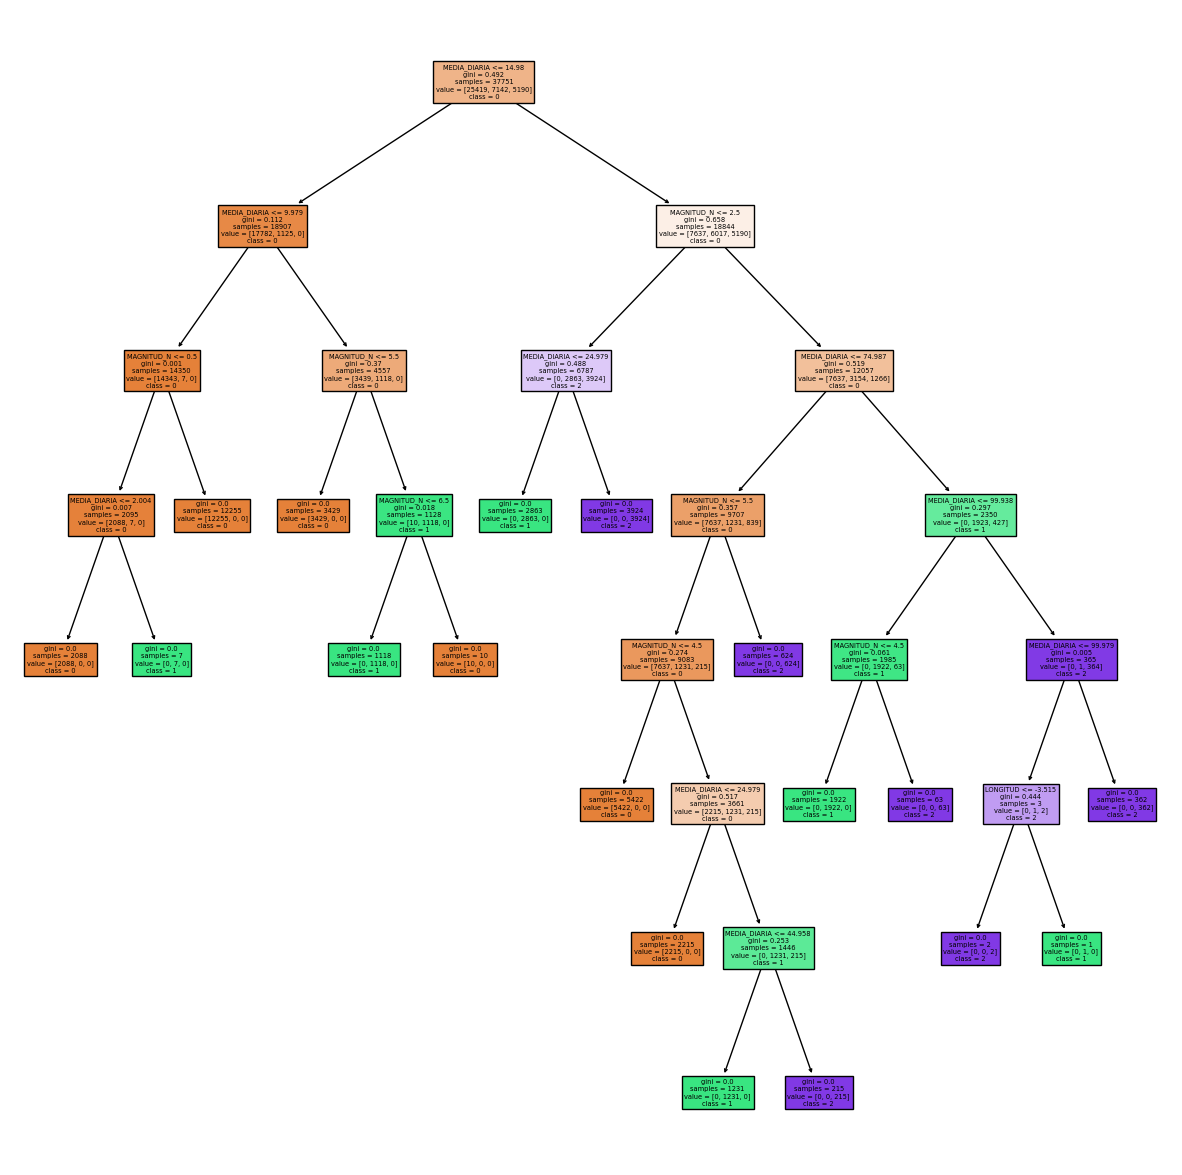

In [5]:
# Visualise the decision tree
from sklearn import tree

fig = plt.figure(figsize=(15, 15))
tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ['0', '1', '2'], filled = True)

plt.show()

### **3. Model prediction**

In [6]:
# Making predictions on the test set
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, ..., 2, 0, 0])

In [7]:
# model accuracy in the test set
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.999876390605686

In [9]:
y_pred = model.predict(X_train)
y_pred

array([0, 2, 0, ..., 0, 0, 0])

In [10]:
accuracy_score(y_train, y_pred)

1.0

In [8]:
from pickle import dump

dump(model, open("../models/DecisionTreeMadrid_23.pk", "wb"))